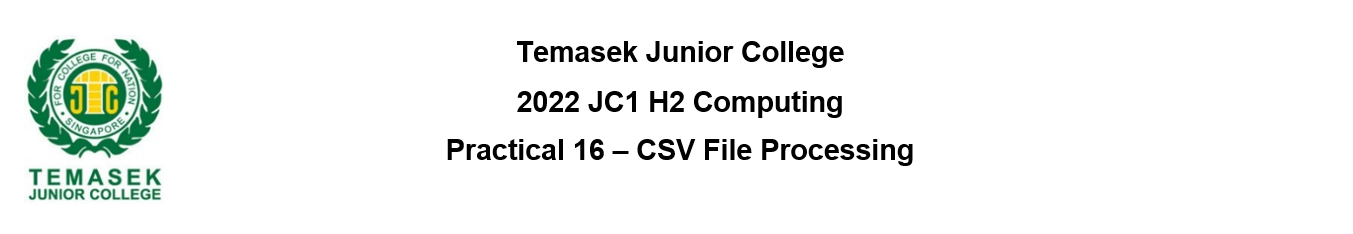

## Instructions
* Complete this notebook. You may include additional notes in the file to help in your learning.
* Submit your completed file through the Practical 16 Google Classroom link at the end of the session.


## Session Objectives:

By the end of this session, you will learn:

1. Handling binary files
2. Handling CSV files - reading, writing and processing data


## 16.1 Handling Binary Files

* In your daily use of computers, you would have probably came across a wide variety of file type e.g. graphic files, word-processing files, spreadhseet files etc. 


* Regardless of the type of file, the content is stored using a defined binary code that allows the file to be used in the way intended.


* For the very specific task of storing data to be used by a computer program, there are only two defined file types.
    * Text file
    * Binary file


* We shall leave the detailed discussion of the characteristics of text files and binary files to the theoretical study of file handling concepts. 


* For now it is sufficient to know that a binary file is a non-text file designed for storing data to be used by a computer program.


* In **Practical 15** we have been working with text files. Now we shall look into binary files.


* By default, Python assumes that the file is a text file when `open()` is used. 



* To work with binary files, e.g. images and sound files, add the character `b` when specifying the `mode`.
    * Use `rb` to read a binary file
    * Use `wb` to write binary content to a file

<u>**Exercise 1**</u>

Write a code to copy the image file `test.png` located in the `images` subfolder of the `Practical 16` folder to the main `Practical 16` folder. 

Rename `test.png` as `duplicate_test.png`.

In [8]:
with open('images/test.png', 'rb') as f:
    content = f.read()

with open('images/duplicate_test.png', 'wb') as f:
    f.write(content)

## 16.2 Handling Records

* A record is a collection of fields containing data values.


* A record data type is a data type that contains a fixed number of components where each component can belong to a different data type.


* A record file is a file containing a collection of records.


* Records can be

    * Fixed length
    * Variable length

**Example of fixed length records**
In the example below, the length of each field is as below:
* id: 4 characters
* name: 20 characters
* dob: 10 characters
* email: 30 characters
* mobile: 8 characters
```
<id><name>              <dob>     <email>                       <mobile>
1   Lim Ah Seng         1995-01-01limahseng@hotmail.com         12345678
2   Tan Ah Lian         1995-12-31tanahlian@yahoo.com           87654321
```


Example of variable length records
```
id,name,dob,email,mobile
1,Lim Ah Seng,1995-01-01,limahseng@hotmail.com,12345678
2,Tan Ah Lian,1995-12-31,tanahlian@yahoo.com,87654321
```

### 16.2.1 Handling Fixed-Length Records

The strategy to **read** a fixed-length record file is to:
* Pass each record as a text string element to a list


* Use string slicing to separate the different components of the record according to the length of each field

<u>**Example 1**</u>

In [14]:
# Pass each record as a text string element to a list 

with open('fixed.txt', 'r') as f:
    fixed_records = f.readlines()

print(fixed_records)

for line in fixed_records:
    print(len(line))

['<id><name>              <dob>     <email>                       <mobile>\n', '1   Lim Ah Seng         1995-01-01limahseng@hotmail.com         12345678\n', '2   Tan Ah Lian         1995-12-31tanahlian@yahoo.com           87654321\n', '3   Lim Ko Pee          1995-02-28limkohpee@coldmail.com        24681357']
73
73
73
72


In [ ]:
for record in fixed_records:
    id = record[0:4]        # 4 char 
    name = record[4:24]     # 20 char
    dob = record[24:34]     # 10 char
    email = record[34:64]   # 30 char
    mobile = record[64:72]  # 8 char
    print(f'ID: {id.strip()}, Name: {name.strip()}, DOB: {dob.strip()}, Email: {email.strip()}, Mobile: {mobile.strip()}')

The stragegy to add a new record to a fixed-length record file is to:

* Check whether there is a new empty line after the last existing record by reading in all the records and printing the last record first.


* Write line as text string with formatting


* Include new line character so that additional record can be added to next line.

In [ ]:
with open('fixed.txt', 'a') as f:
    f.write('\n{0:<4}{1:<20}{2:<10}{3:<30}{4:<8}'.format(3, "Lim Ko Pee", "1995-02-28", "limkohpee@coldmail.com", "24681357"))

In [ ]:
with open('fixed.txt', 'r') as f:
    fixed_records = f.readlines()

print(fixed_records)

In [ ]:
for record in fixed_records:
    id = record[0:4]        # 4 char 
    name = record[4:24]     # 20 char
    dob = record[24:34]     # 10 char
    email = record[34:64]   # 30 char
    mobile = record[64:72]  # 8 char
    print(f'ID: {id.strip()}, Name: {name.strip()}, DOB: {dob.strip()}, Email: {email.strip()}, Mobile: {mobile.strip()}')

<u>**Question**</u>

What happens if you need to add more than 1 record?

### 16.2.2 Handling Variable-Length Records

* A variable-length record usually occurs in the form of a delimited file eg CSV (comma separated values) files


* The `csv` module is common used to handle such records.

## 16.3 CSV File Processing

### 16.3.1 What is a CSV File?
CSV files are plain text files which use a specific format to store tabular data. CSV stands for "Comma Separated Values".

* Each line of the file is a data record. 
* Each record consists of one or more fields, separated by commas.
* The first line of the file usually gives the categories of each component.

```
id,name,dob,email,mobile
1,Lim Ah Seng,1995-01-01,limahseng@hotmail.com,12345678
2,Tan Ah Lian,1995-12-31,tanahlian@yahoo.com,87654321
```

* CSV is a common format for data exchange because it is simple and compact.
* Most relational databases provides tools to import and export CSV files.
* CSV files can be easily opened in MS Excel.

### 16.3.2 Python CSV Module

While we could use the built-in `open()` function to work with CSV files in Python, there is a dedicated `csv` module that makes working with CSV files much easier. It contains following built-in functions:

* `csv.reader()`
* `csv.writer()`
* `csv.writerow()`

In [ ]:
import csv

help(csv)

### 16.3.3 Reading CSV Files Using `csv.reader`

After opening a CSV file, create a `csv.reader` object which returns an iterable object to process CSV data.
* Each record is represented as a list.
* All fields are of the `string` data type.

<u>**Example 2**</u>

Use `csv.reader` to read and print out all the records in `'olympics-medals-sample.csv'`

In [ ]:
import csv

with open('olympics-medals-sample.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)

<u>**Question**</u>

Modify the code above to save the records into a list instead of printing out the records.

### <u>Skip Header Row</u>

The `next()` function can be used to isolate the first row, which is commonly the header categories.

<u>**Example 3**</u>

From `'olympics-medals-sample.csv'`, retrieve header and data in separate lists.

In [ ]:
import csv

with open('olympics-medals-sample.csv') as f:
    reader = csv.reader(f)
    header = next(reader)
    data = [row for row in reader]

print(header)
print(data)

### <u>Using `csv.DictReader`</u>

Rather than deal with a list of individual String elements, the `csv.DictReader` reads CSV data directly into an `OrderedDict` (Ordered Dictionary).

An **`OrderedDict`** is a dictionary subclass that preserves the order of the keys inserted. A regular dictionary does not track the insertion order, and iterating it gives the values in an arbitrary (random) order.

<u>**Example 4**</u>

Use `csv.DictReader()` to read the `'olympics-medals-sample.csv'` file.

Save the header into a list and data into a list of OrderedDict objects.

In [ ]:
import csv

with open('olympics-medals-sample.csv') as f:
    reader = csv.DictReader(f)
    header = reader.fieldnames
    print(header)
    for row in reader:
        for key in row:
            print(f'{key}: {row[key]} ', end=' ')
        print() # to start on a new line

## 16.4 Writing CSV Files Using `csv.writer()` 

* A `csv.writer()` can be used to write a CSV file. 


* The `csv.writer()` function returns a `writer` object that converts the user's data into a delimited string and write to file using its `writerow()` function.


* The `newline` argument is set to `''` when opening a file for the `csv.writer()` to write each row in a line.

<u>**Example 5**</u>

Use `csv.writer()` to save following data into a csv file `'sample.csv'`.

```
["Symbol", "Name", "Price (Intraday)"]
["TMVWY", "TeamViewer AG", 21.05]
["AXSM", "Axsome Therapeutics, Inc.", 88.87]
["SAGE", "Sage Therapeutics, Inc.",	53.36]
```

In [ ]:
import csv

# Pass all records into a list. Each record is a nested sub-list.
records = [["Symbol", "Name", "Price (Intraday)"], 
           ["TMVWY", "TeamViewer AG", 21.05],
           ["AXSM", "Axsome Therapeutics, Inc.", 88.87],
           ["SAGE", "Sage Therapeutics, Inc.",    53.36]]

# Open sample.csv in the write mode
with open('sample.csv', 'w', newline = '') as f:
    writer = csv.writer(f)
    for record in records:
        writer.writerow(record)

In [ ]:
!notepad sample.csv

You may also locate the file in the current directory and view it on MS Excel or any equivalent spreadsheet software.

<u>**Question**</u>

Can you write multiple lines of records without using the `for` loop?

<u>**Example 6**</u>

Use `writerows()` method `csv.writer()` to save following data into a csv file `'sample2.csv'`.

```
["Symbol", "Name", "Price (Intraday)"]
["TMVWY", "TeamViewer AG", 21.05]
["AXSM", "Axsome Therapeutics, Inc.", 88.87]
["SAGE", "Sage Therapeutics, Inc.",	53.36]
```

In [ ]:
import csv

records = [["Symbol", "Name", "Price (Intraday)"], 
           ["TMVWY", "TeamViewer AG", 21.05],
           ["AXSM", "Axsome Therapeutics, Inc.", 88.87],
           ["SAGE", "Sage Therapeutics, Inc.",    53.36]]

# Open sample.csv in the write mode
with open('sample2.csv', 'w', newline = '') as f:
    writer = csv.writer(f)
    writer.writerows(records)

In [ ]:
!notepad sample2.csv

## 16.5 Basic CSV File Processing 

### 16.5.1 Loading Data to List

<u>**Exercise 2**</u>

Each record in the variable length record file `'sample-sales-data.csv'` contains 4 fields: `Date`, `Company`, `Product` and `Units`.

The headers for these fields are provided in the first line of the file.

Save these headers into a list `header` and all other records into the list `data`.

Display these lists.

In [ ]:
# Enter your code here



### 16.5.2 Identifying Unique Data

<u>**Exercise 3**</u>

Generate a list `companies`, which lists the names of all the companies found in the variable length record file `'sample-sales-data.csv'`

In [ ]:
# Enter your code here



<u>**Exercise 4**</u>

Generate a list `dates`, which lists all the dates which has sales recorded by any of the companies found in `'sample-sales-data.csv'`

In [ ]:
# Enter your code here



### 16.5.3 Filtering Required Data

<u>**Exercise 5**</u>

Generate a list `initech`, which contains all the sales records by the company 'Initech' found in `'sample-sales-data.csv'`

In [ ]:
# Enter your code here



### 16.5.4 Handling Invalid Data

<u>**Exercise 6**</u>

Some of the data provided in `'sample-sales-data.csv'`on the number of units sold are invalid. This renders the entire record invalid. Remove these records.

* Check the original csv file to see what are the valid or invalid number of units

In [ ]:
# Enter your code here



### 16.5.5 Computing Records

<u>**Exercise 7**</u>

Find the total number of pieces of hardware sold by all companies.

In [ ]:
# Enter your code here



## 16.6 More on `csv.reader()` and `csv.writer()`

In [ ]:
import csv

In [ ]:
help(csv.reader)

In [ ]:
help(csv.writer)

From the documentations of `csv.reader()` and `csv.writer()`, we can see that both functions have parameters that can take in optional keyword arguments. We shall take a look at some of the common optional keyword arguments used. 

### 16.6.1 The `delimiter` parameter

* The character used to separate the different categories of values in each record of a csv file is called the delimiter. 


* By default, the delimiter used in csv files is the comma `,`, hence the name comma separated values (csv).


* Apart from comma `,`, we may also use other characters as delimiters such as tab `\t`, colon `:` and semi-colon `;`.


* When using tab as the delimeter, it is common to the record file with the extension `.tsv`.


* A tsv file can also be processed using the `csv` module.

<u>**Example 7**</u>

Use `csv.reader()` to read the tsv file `'olympics-medals-sample.tsv'`. 

Save on separate lists the header row and the records.

In [ ]:
!notepad olympics-medals-sample.tsv

In [ ]:
import csv

data = []

with open('olympics-medals-sample.tsv', 'r') as f:
    reader = csv.reader(f, delimiter = '\t')  # Specify the delimiter when it is not the default character of comma (,).
    header = next(reader)
    for row in reader:
        data.append(row)

print(header)
print(data)

### 16.6.2 The `quotechar` and `quoting` parameters (self-read)

<u>**Quote Characters**</u>

* The character used for quoting strings is the quote character. 


* It is referred to by the `quotechar` parameter.


* By default, the quote character is the double quotation marks `" "`.

<u>**Quoting Format**</u>

* The quoting format refers to how the data in each record will be quoted with the qoute character. 


* It is referred to by the `quoting` parameter.


* There are a few formats of quoting:
    * `csv.QUOTE_ALL`: All fields will be quoted
    * `csv.QUOTE_MINIMAL`: Only fields containing the delimiter or quote character will be quoted.
    * `csv.QUOTE_NONNUMERIC`: The writer will quote all fields containing text and it converts fields with only numbers to float values
    * `csv.QUOTE_NONE`: No fields will be quoted, the writer instead escapes delimiters. If you use this value, you also need to provide the escapechar argument (see next section).
    

* By default, the quoting format is `csv.QUOTE_MINIMAL`.

<u>**Example 8**</u>

Create the file 'stock_sample.tsv' and add the following header row and record row to the file. 

```python
    ['stock', 'price', 'cost', 'profit']
    ['100', '200', '300', '400']
```
Use the following parameters for the `csv.writer()` function.

```python
    delimiter = '\t'
    quotechar = '|'
```

In [ ]:
import csv

with open('stock_sample.tsv', 'w', newline = '') as f:
    writer = csv.writer(f, delimiter = '\t', quotechar = '|')  # Quoting format not specifed. Takes default of quote minimal.
    writer.writerow(['stock', 'price', 'cost', 'profit'])
    writer.writerow(['100', '200', '300', '400'])

In [ ]:
!notepad stock_sample.tsv

<u>**Example 9**</u>

Append the following record to the 'stock_sample.tsv' file

```python
    ['21', '121.34', '45.34', '76']
```
Use the following parameters for the `csv.writer()` function.

```python
    delimiter = '\t'
    quotechar = '|'
    quoting = csv.QUOTE_ALL 
```

In [ ]:
with open('stock_sample.tsv', 'a', newline = '') as f:
    writer = csv.writer(f, delimiter = '\t', quotechar = '|', quoting = csv.QUOTE_ALL)
    writer.writerow(['21', '121.34', '45.34', '76'])

In [ ]:
!notepad stock_sample.tsv

<u>**Example 10**</u>

Append the following record to the 'stock_sample.tsv' file

```python
    ['31', '131.34', '35.34', '96']
```
Use the following parameters for the `csv.writer()` function.

```python
    delimiter = '\t'
    quotechar = '|'
    quoting = csv.QUOTE_NONNUMERIC 
```

In [ ]:
with open('stock_sample.tsv', 'a', newline = '') as f:
    writer = csv.writer(f, delimiter = '\t', quotechar = '|', quoting = csv.QUOTE_NONNUMERIC)
    writer.writerow([31, '131.34', 35.34, '96'])  # 131.14 and 96 are strings while 31 and 35.34 are numerical data

In [ ]:
!notepad stock_sample.tsv

<u>**Example 11**</u>

Append the following record to the 'stock_sample.tsv' file

```python
    ['4|1', '131.34', '35.34', '9\t6']
```
Use the following parameters for the `csv.writer()` function.

```python
    delimiter = '\t'
    quotechar = '|'
    quoting = csv.QUOTE_MINIMAL
```

In [ ]:
with open('stock_sample.tsv', 'a', newline = '') as f:
    writer = csv.writer(f, delimiter = '\t', quotechar = '|', quoting = csv.QUOTE_MINIMAL)
    writer.writerow(['4|1', '131.34', '35.34', '9\t6'])

In [ ]:
!notepad stock_sample.tsv

<u>**Example 12**</u>

Read the file 'stock_sample.tsv' which you have just created.

Generate the header row and the records on separate lists.

In [ ]:
import csv

data = []

with open('stock_sample.tsv', 'r') as f:
    reader = csv.reader(f, delimiter = '\t', quotechar = '|', quoting = csv.QUOTE_ALL) # Assume all fields quoted when unsure.
    header = next(reader)
    for row in reader:
        data.append(row)
        
print(header)
for row in data:
    print(row)

### 16.6.3 The `escapechar` parameter (self-read)

* To separate delimiter characters in the entries, the `csv` module by default quotes the entries using quotation marks.

    e.g. 
        
    The entry `Hello, World!` (without quote characters) would be written as `"Hello, World!"` (with the default double quotes as the quote character or the specified quote character).


* By default, the `csv` module also uses double quotes `" "` to escape quote characters present in the entries by default.

    e.g.

    The entry: `Hello, "World"!` would be written as: `"Hello, ""World"""`.

    Observe that "World" is now written as ""World"". The front and back double quotes is used to escape those that were intially present.

<u>**Example 13**</u>

Create the file 'book_quotes.csv' and add the following header row and record row to the file. 

```python
    ['Book', 'Quote']
    ['Lord of the Rings', '"All we have to decide is what to do with the time that is given us."']
```
Use the following parameters for the `csv.writer()` function.

```python
    escapechar = '/'
    quoting = csv.QUOTE_NONE
```

In [ ]:
import csv

with open('book_quotes.csv', 'w', newline = '') as f:
    writer = csv.writer(f, escapechar ='/', quoting = csv.QUOTE_NONE)  # No entries will be quoted. Escape character required.  
    writer.writerow(['Book', 'Quote'])
    writer.writerow(['Lord of the Rings', '"All we have to decide is what to do with the time that is given us."']) 
    # Note that the quote used is a string that is being double quoted.

In [ ]:
!notepad book_quotes.csv

<u>**Example 14**</u>

Append the same record to the 'book_quotes.csv' file

```python
    ['Lord of the Rings', '"All we have to decide is what to do with the time that is given us."']
```

No optional keyword arguments are required for the parameters.

In [ ]:
import csv

with open('book_quotes.csv', 'a', newline = '') as f:
    writer = csv.writer(f)  # No entries will be quoted. Escape character required.  
    writer.writerow(['Lord of the Rings', '"All we have to decide is what to do with the time that is given us."'])
    # No escape character defined.

In [ ]:
!notepad book_quotes.csv

Observe that the saved quote is generated as """All we have to decide is what to do with the time that is given us.""". There are 3 pairs of double quotes. We can understand this occurence using the following logic.


* Since no argument for the parameter `escapechar` is specified, it defaults to double quotes `" "`. 


* As such double quotes `" "` will be used to escape the innermost pair which belongs to the record being entered. This is the middle pair of double quotes. This will allow the innermost pair of double quotes to be interpreted as punctation rather than quote character. 


* Since no argument for the parameter `quoting` is specified, it defaults to `csv.QUOTE_MINIMAL`. This means that fields containing the delimiter or quote character will be quoted. 


* Since no argument for the parameter `quotechar` is specified, it defaults to double quotes`" "`. 


* The string `'"All we have to decide is what to do with the time that is given us."'` contains the double quote punctuation `" "`, which is the inner most pair of double quotes.


* Since csv.QUOTE_MINIMAL specifies that fields containing the delimiter or quote character will be quoted, a pair of double quotes is added. This is the outermost pair of double quotes. 

### 16.6.4 The `skipinitialspace` parameter

* Some records may contain extra spacings after the delimiter.

  
* It is useful to strip away the whitespaces right from the start when reading in the records for processing. 


* This elimates the need to check for whitespaces before each field prior to processing the records. 


* We can do so by definining the `skipinitialspace` parameter as `True`. By default, the value of the `skipinitialspace` `parameter` is False when not specified.

<u>**Example 15**</u>

Read the file 'people.csv'.

Print out each row as a separate list.

In [ ]:
import csv

with open('people.csv', 'r') as f:
    reader = csv.reader(f, skipinitialspace = True)
    for row in reader:
        print(row)

In [ ]:
import csv

with open('people.csv', 'r') as f:
    reader = csv.reader(f) # When skipinitialspace is not specified, it defaults to False. Hence white
    for row in reader:
        print(row)

When in doubt, it is alright to just define the value of `skipinitialspace` as `True`